In [116]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [117]:
import numpy as np
from numpy import fft,pi
import scipy.signal

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import ps_utils_new
import imp
imp.reload(ps_utils_new)

<module 'ps_utils_new' from '/Users/abrahamn/21cmIR/21cmIRxcor/ps_utils_new.py'>

In [118]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Arial')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [119]:
analysis_root = '/volumes/abraham/xcor_data/analysis/two_night_comparison/'
analysis_names = ['night1','night2']

In [120]:
ir_images = [ps_utils_new.IRImage(analysis_root+analysis_name+'_mask_artifacts_sources_coarse.fits',run_poly_fit=False) for analysis_name in analysis_names] # mask artifacts and sources
#ir_images_polyfit = [ps_utils_new.IRImage(analysis_root+analysis_name+'_mask_artifacts_sources_coarse.fits',run_poly_fit=True) for analysis_name in analysis_names] # mask artifacts and sources

loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night1_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night2_mask_artifacts_sources_coarse.fits


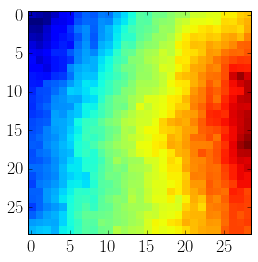

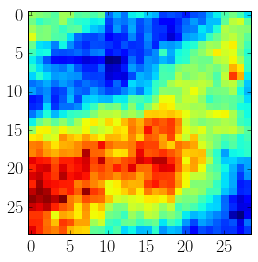

In [121]:
plt.imshow(ir_images[0].full_ADU,interpolation='nearest')
plt.figure()
plt.imshow(ir_images[1].full_ADU,interpolation='nearest')

In [131]:
nbins = 20
lmax = 3000
lmin = 300

lbincenters,xspec,pspec1,pspec2,bin_counts = ps_utils_new.ir_and_ir_full_xspec(ir_images[0],ir_images[1],nbins,lmin,lmax)
lbincenters,xspec_flip,pspec1_flip,pspec2_flip,bin_counts_flip = ps_utils_new.ir_and_ir_full_xspec(ir_images[0],ir_images[1],nbins,lmin,lmax,flip=True)

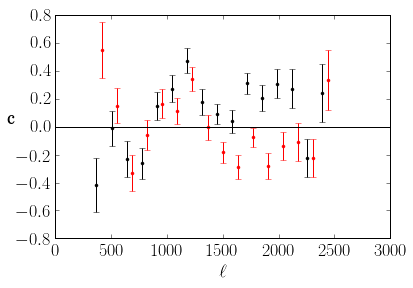

In [132]:
matplotlib.rcParams.update({'font.size': 18})

c = xspec/np.sqrt(pspec1*pspec2)
dc = np.sqrt(.5*(1+c**2)/bin_counts)

c_flip = xspec_flip/np.sqrt(pspec1_flip*pspec2_flip)
dc_flip = np.sqrt(.5*(1+c_flip**2)/bin_counts_flip)

plt.errorbar(lbincenters,c,dc,fmt='k.')
plt.errorbar(lbincenters+50,c_flip,dc_flip,fmt='r.')
plt.xlabel('$\ell$')
plt.ylabel('c',rotation=0)
plt.plot([0,lmax],[0,0],'k-')

In [133]:
c

array([-0.41704699, -0.01092981, -0.23345255, -0.26160523,  0.14834224,
        0.274321  ,  0.47186667,  0.17746795,  0.09249969,  0.03804086,
        0.31102627,  0.20650655,  0.30944296,  0.27212304, -0.22630963,
        0.24097188,         nan,         nan,         nan,         nan])